Copyright ©2022. Stephen Rigden.
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program.  If not,
see <https://www.gnu.org/licenses/>.

# Plot Blood Pressure

In [1]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn

from heart_health.utilities import TimeBins, create_blood_pressure_dataset


seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [2]:
project_path = Path.cwd().parent.parent
heart_df_pickle = project_path / 'data' / 'processed' / 'heart_preprocessed.pickle'
blood_pressure_pdf = project_path / 'reports' / 'blood_pressure.pdf'
blood_pressure_jpg = project_path / 'reports' / 'blood_pressure.jpg'

In [3]:
ds = pandas.read_pickle(heart_df_pickle)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21504 entries, 0 to 21503
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   21504 non-null  float64       
 1   type    21504 non-null  object        
 2   date    21504 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 672.0+ KB


In [4]:
bpds = create_blood_pressure_dataset(ds)
bpds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            672 non-null    datetime64[ns]
 1   systolic        672 non-null    float64       
 2   diastolic       672 non-null    float64       
 3   pulse pressure  672 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 26.2 KB


In [5]:
bpds.head()

,date,systolic,diastolic,pulse pressure
0,1875-06-01 00:00:00,122.0,87.0,35.0
1,1875-06-01 06:00:00,155.0,91.0,64.0
2,1875-06-01 12:00:00,125.0,88.0,37.0
3,1875-06-01 18:00:00,127.0,81.0,46.0
4,1875-06-02 00:00:00,109.0,78.0,31.0


In [6]:
start = bpds.date.min()
end = bpds.date.max()

categories = TimeBins(start_date=start, end_date=end)
categories

TimeBins(start_date=Timestamp('1875-06-09 18:00:00'), end_date=Timestamp('1875-11-15 18:00:00'), bin_size=16, bin_count=10)

In [7]:
bpds['bucket'] = bpds['date'].apply(categories.get_bin)
bpds.tail()

,date,systolic,diastolic,pulse pressure,bucket
667,1875-11-14 18:00:00,121.0,87.0,34.0,1875-11-15
668,1875-11-15 00:00:00,98.0,79.0,19.0,1875-11-15
669,1875-11-15 06:00:00,119.0,77.0,42.0,1875-11-15
670,1875-11-15 12:00:00,88.0,77.0,11.0,1875-11-15
671,1875-11-15 18:00:00,110.0,82.0,28.0,1875-11-15


[Text(0.5, 0, '16 Day Intervals. (last day shown)'),
 Text(0, 0.5, 'observation count')]

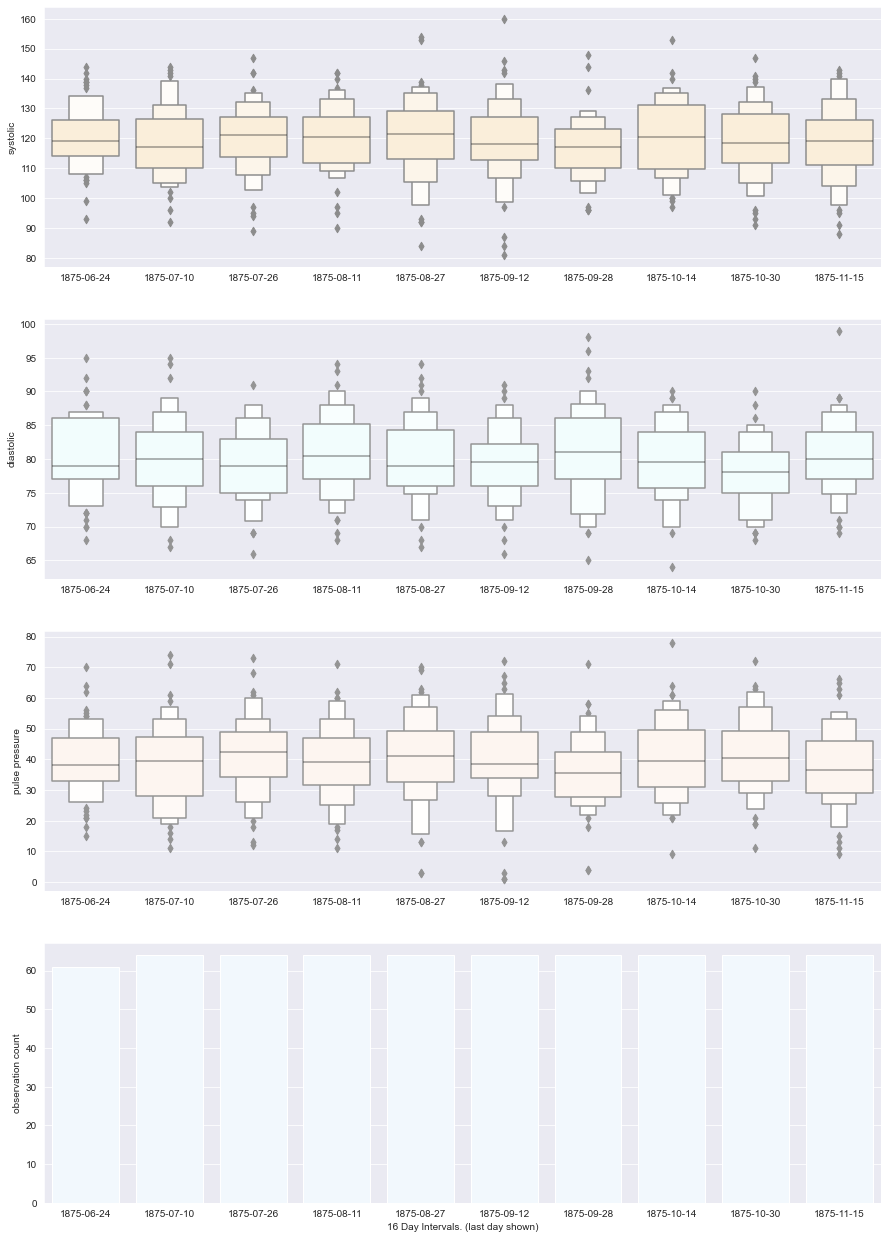

In [8]:
fig, axes = pyplot.subplots(nrows=4, ncols=1, figsize=(15, 22))

# Plot systolic
seaborn.boxenplot(data=bpds,
                  x='bucket', y='systolic',
                  ax=axes[0], palette=['papayawhip'])

# Plot diastolic
seaborn.boxenplot(data=bpds,
                  x='bucket', y='diastolic',
                  ax=axes[1], palette=['azure'])

# Plot pulse pressure
seaborn.boxenplot(data=bpds,
                  x='bucket', y='pulse pressure',
                  ax=axes[2], palette=['seashell'])

# Plot observation counts
seaborn.countplot(data=bpds,
                  x='bucket',
                  ax=axes[3], palette=['aliceblue'])

axes[0].set(xlabel=None)
axes[1].set(xlabel=None)
axes[2].set(xlabel=None)
axes[3].set(xlabel=f"{categories.bin_size} Day Intervals. (last day shown)", ylabel='observation count')

In [9]:
# Save the plots
fig.savefig(blood_pressure_jpg)
fig.savefig(blood_pressure_pdf)